# The `Model` object

To train a neural network in `mlfz`, you should use the `Model` class that provides a convenient interface to interact with computational graphs.

It's best to provide an example, so here we go!

In [1]:
from mlfz.nn.scalar import Scalar
from mlfz.nn import Model


class Linear(Model):
    def __init__(self):
        self.a = Scalar(1)
        self.b = Scalar(1)

    def forward(self, x):
        return self.a * x + self.b
    
    def parameters(self):
        return {"a": self.a, "b": self.b}

Each `Model` subclass has two key methods that you have to implement: `forward` and `parameters`. `forward` defines the computational graph and acts as a callable that turns inputs into predictions, while `parameters` enumerate the `Scalar`-s that have to be updated during gradient descent.

Let's see our model in action!

In [2]:
linear = Linear()

linear.forward(2)

Scalar(3)

`Model` instances are callable, and the function call operator is just a shortcut to the `forward` method.

In [3]:
linear(2)

Scalar(3)

In [4]:
linear.parameters()

{'a': Scalar(1), 'b': Scalar(1)}

This is be a good time to highlight that scalar operations work with vanilla number types, like integers, floats, whatever. It's just for convenience, saving us to type `Scalar(...)` all the time.

To train this simple model, we'll generate a toy dataset from the target function $ h(x) = 0.8 x - 1.2 $.

In [5]:
from random import random, normalvariate


xs = [random() for _ in range(100)]
ys = [0.8*x - 1.2 + normalvariate(0, 0.1) for x in xs]

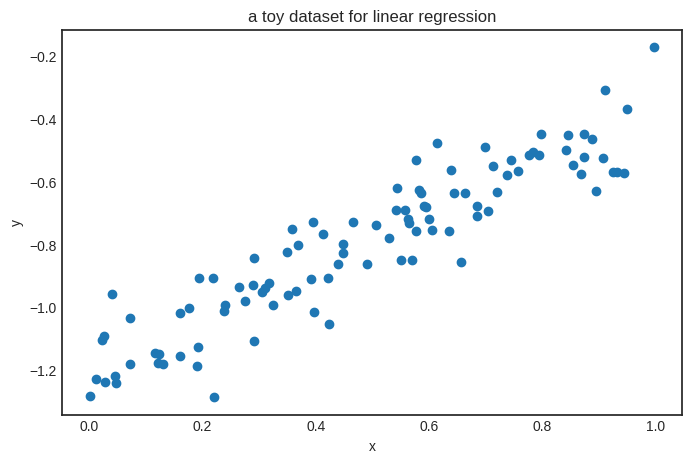

In [6]:
import matplotlib.pyplot as plt


with plt.style.context("seaborn-v0_8-white"):
    plt.figure(figsize=(8, 5))
    plt.scatter(xs, ys)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('a toy dataset for linear regression')
    plt.show()

We'll also need a loss function as well. Let's go with the simplest one: the mean squared error, defined by the formula

$$
\mathrm{MSE}(\widehat{\mathbf{y}}, \mathbf{y}) = \frac{1}{N} \sum_{i=1}^{N} (\widehat{y_i} - y_i)^2,
$$

where $ \widehat{\mathbf{y}} \in \mathbb{R}^N $ is the vector of predictions, while $ \mathbf{y} \in \mathbb{R}^N $ is the vector of ground truths.

In [7]:
from mlfz.nn.scalar.loss import mean_squared_error


preds = [linear(x) for x in xs]
mean_squared_error(preds, ys)


Scalar(5.229965385474443)

We have everything ready to train our model with gradient descent.

In [8]:
n_steps = 100
lr = 0.2


for i in range(n_steps):
    preds = [linear(x) for x in xs]
    l = mean_squared_error(preds, ys)
    l.backward()
    linear.gradient_update(lr=lr)
    
    if i == 0 or (i + 1) % 10 == 0:
        print(f"step no. {i + 1}, loss = {l.value}")

step no. 1, loss = 5.229965385474443
step no. 10, loss = 0.03817228752720326
step no. 20, loss = 0.026870747079765514
step no. 30, loss = 0.01994319251658441
step no. 40, loss = 0.015689508830727745
step no. 50, loss = 0.013077645613879427
step no. 60, loss = 0.011473899316004113
step no. 70, loss = 0.010489160846026985
step no. 80, loss = 0.009884507943296914
step no. 90, loss = 0.009513236642411932
step no. 100, loss = 0.00928526721029898


Here's the result.

In [9]:
linear.parameters()

{'a': Scalar(0.7689342255742234), 'b': Scalar(-1.170082497762477)}

Looks good! The parameters seem to be close to the target function $ h(x) = 0.8x - 1.2 $. Here's the plot.

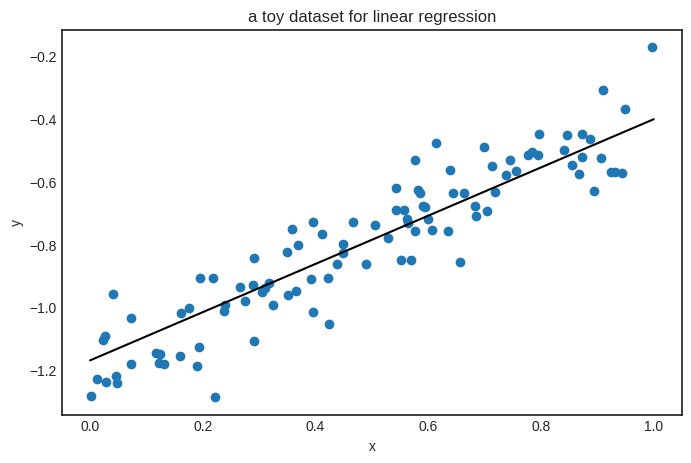

In [10]:
with plt.style.context("seaborn-v0_8-white"):
    plt.figure(figsize=(8, 5))

    xs_plot = [0.01 * k for k in range(101)]
    ys_plot = [linear(x).value for x in xs_plot]
    plt.plot(xs_plot, ys_plot, c="k")

    plt.scatter(xs, ys)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('linear regression on our toy dataset')
    plt.show()